In [1]:
import numpy as np
import tensorflow as tf

from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.datasets import mnist

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
simple_ann_train_features = np.loadtxt('simple_ann_train_features.out', dtype='float32', delimiter=' ')

In [3]:
simple_ann_test_features = np.loadtxt('simple_ann_test_features.out', dtype='float32', delimiter=' ')

In [4]:
simple_ann_train_features.shape

(60000, 512)

In [5]:
simple_ann_test_features.shape

(10000, 512)

In [6]:
(_, y_train), (_, y_test) = mnist.load_data()

In [7]:
y_train = tf.keras.utils.to_categorical(
    y_train, dtype='float32'
)

In [8]:
y_test = tf.keras.utils.to_categorical(
    y_test, dtype='float32'
)

In [15]:
model = Sequential()

model.add(Dense(512, input_shape=(512,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

earlyStopping = EarlyStopping(monitor='val_loss', 
                              patience=32)

model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

history = model.fit(simple_ann_train_features,
                    y_train,
                    epochs=250, 
                    batch_size=1000, 
                    verbose=0, 
                    validation_split=0.2, 
                    callbacks=[earlyStopping])

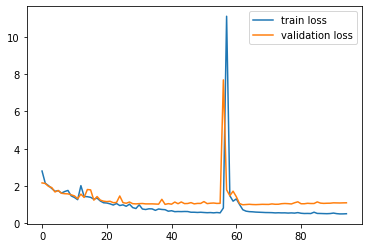

In [16]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()

In [17]:
test_results = model.evaluate(simple_ann_train_features, y_train, verbose=1)

1875/1875 [==============================] - 3s 1ms/step - loss: 0.6183 - accuracy: 0.8050


In [18]:
predictions = model.predict(simple_ann_train_features)

In [19]:
l = []
for y, p in zip(y_test, predictions): 
    l.append(y - p)

(array([2.8480e+03, 7.4700e+02, 6.1200e+02, 3.9600e+02, 1.1770e+03,
        1.0500e+03, 9.8400e+02, 1.1260e+03, 8.7500e+02, 9.8400e+02,
        1.1090e+03, 1.2700e+03, 1.6070e+03, 2.6260e+03, 7.2589e+04,
        3.3500e+02, 8.0000e+01, 5.8000e+01, 2.9000e+01, 1.4500e+02,
        1.1400e+02, 8.7000e+01, 1.4300e+02, 8.6000e+01, 1.0000e+02,
        1.2800e+02, 1.3500e+02, 1.6700e+02, 2.7200e+02, 8.1210e+03]),
 array([-9.9882072e-01, -9.3219334e-01, -8.6556602e-01, -7.9893863e-01,
        -7.3231131e-01, -6.6568393e-01, -5.9905660e-01, -5.3242922e-01,
        -4.6580186e-01, -3.9917451e-01, -3.3254716e-01, -2.6591980e-01,
        -1.9929244e-01, -1.3266508e-01, -6.6037722e-02,  5.8963895e-04,
         6.7217000e-02,  1.3384436e-01,  2.0047171e-01,  2.6709908e-01,
         3.3372644e-01,  4.0035379e-01,  4.6698114e-01,  5.3360850e-01,
         6.0023588e-01,  6.6686320e-01,  7.3349059e-01,  8.0011791e-01,
         8.6674529e-01,  9.3337262e-01,  1.0000000e+00], dtype=float32),
 <BarContaine

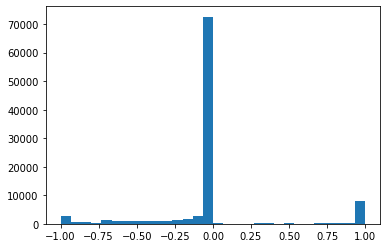

In [20]:
plt.hist(np.array(l).flatten(), bins=30)